# Neural Style Transfer

# Importing Libraries

In [1]:
from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as tf_hub
import PIL
from google.colab import files

# Image Processing Function

In [2]:
def load_image(image,image_size=(512,512)):
  img = tf.io.read_file(image)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  img = img[tf.newaxis, :]
  return img

# Uploading Original Image

In [3]:
upload = files.upload()

Saving mountain.jpg to mountain.jpg


In [4]:
original_image = load_image("mountain.jpg")

In [5]:
original_image.shape

TensorShape([1, 270, 512, 3])

# Upload Style Image

In [6]:
upload=files.upload()

Saving moon.jpg to moon.jpg


In [7]:
Style_image = load_image("moon.jpg")

In [8]:
Style_image.shape

TensorShape([1, 341, 512, 3])

# Display Function

In [9]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

# Displaying Images

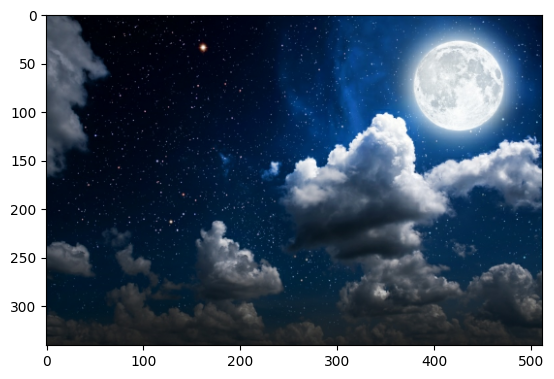

In [16]:
imshow(Style_image)

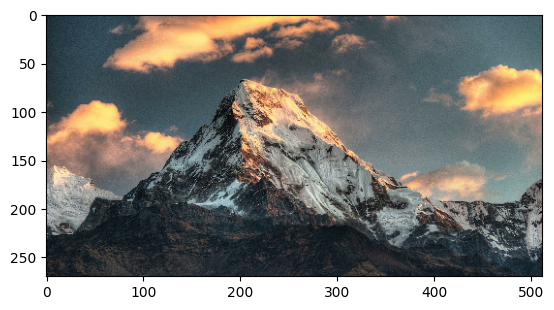

In [11]:
imshow(original_image)

# Hub Handle

In [12]:
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'

# Hub Module

In [13]:
hub_module = tf_hub.load(hub_handle)

# Neural Style Trasnfer

In [14]:
outputs = hub_module(original_image,Style_image)

# Displaying Styled Image

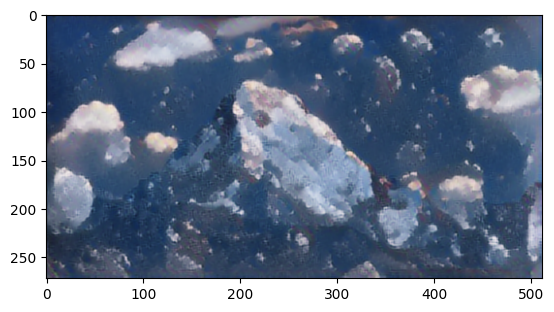

In [15]:
imshow(outputs[0])